In [6]:
!curl -o car_fuel_efficiency.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  853k  100  853k    0     0  1848k      0 --:--:-- --:--:-- --:--:-- 1851k


In [49]:
import pandas as pd
df = pd.read_csv('car_fuel_efficiency.csv')

In [150]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,240,3.0,188.0,3484.471854,11.5,2006,USA,Diesel,Front-wheel drive,-2.0,13.562769
1,200,9.0,178.0,2265.009335,16.4,2013,Europe,Diesel,All-wheel drive,-2.0,18.709434
2,100,2.0,NaN,3472.730050,18.8,2006,Asia,Diesel,Front-wheel drive,0.0,12.726028


In [13]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\mohai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
df.horsepower.median()

np.float64(149.0)

<Axes: ylabel='Count'>

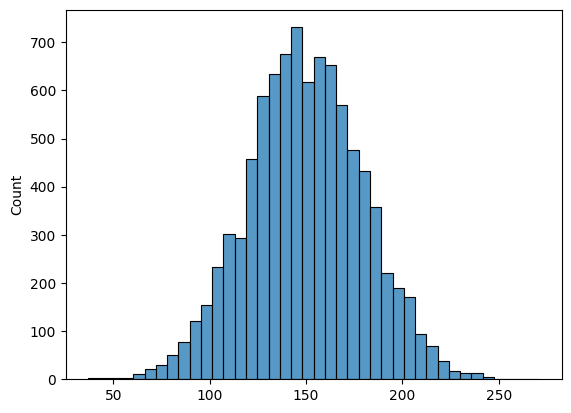

In [62]:
import numpy as np
import seaborn as sns
sns.histplot(df['horsepower'].fillna(df['horsepower'].mode()).values, bins=40)

In [73]:
df.head(20)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [70]:
import random
random.seed(42)
index = np.arange(len(df))
random.shuffle(index)

In [81]:
df = df.iloc[index].reset_index(drop=True)

In [105]:
train_index = int(0.6*len(df))
val_index = int(0.2*len(df))
test_index = int(0.2*len(df))
df_train = df.iloc[:train_index]
df_val = df.iloc[train_index:train_index+val_index]
df_test = df.iloc[train_index+val_index:]

In [84]:
len(df_test)+len(df_val)+len(df_train) == len(df)

True

<Axes: ylabel='Count'>

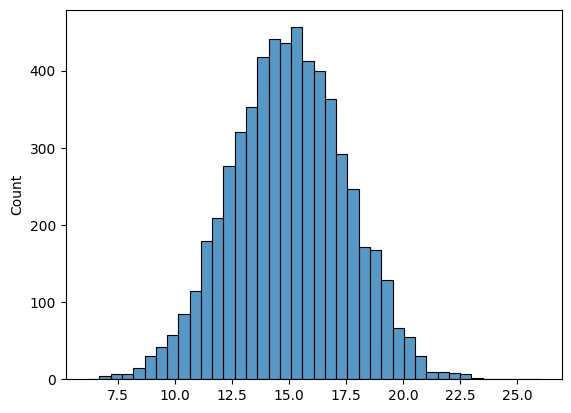

In [89]:
sns.histplot(df_train.fuel_efficiency_mpg.values,bins=40)

In [87]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [90]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [107]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [108]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [151]:
# dft = df_train.loc[:, df_train.dtypes[df_train.dtypes != 'object'].index.tolist()]
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']

In [152]:
dft = df_train.loc[:, base]
dfv = df_val.loc[:, base]

In [153]:
# for c in dft.columns:
#     dft[c] = dft[c].fillna(dft[c].median())
dft.horsepower = dft.horsepower.fillna(dft.horsepower.mean())
dfv.horsepower = dfv.horsepower.fillna(dft.horsepower.mean())

In [154]:
Xtrain = dft.to_numpy()
Xval = dfv.to_numpy()

In [155]:
w0, w = train_linear_regression(Xtrain, y_train)

In [156]:
y_pred = w0 + Xval.dot(w)

In [157]:
w0

np.float64(26.62986940162558)

<Axes: ylabel='Count'>

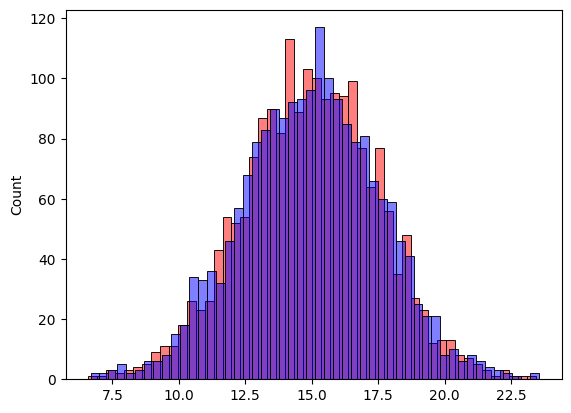

In [158]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [159]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [160]:
rmse(y_val, y_pred)

np.float64(0.46558976676101366)

In [161]:
dft.horsepower = dft.horsepower.fillna(0)
dfv.horsepower = dfv.horsepower.fillna(0)

In [164]:
Xtrain = dft.to_numpy()
Xval = dfv.to_numpy()

In [165]:
w0, w = train_linear_regression(Xtrain, y_train)

In [166]:
y_pred = w0 + Xval.dot(w)

<Axes: ylabel='Count'>

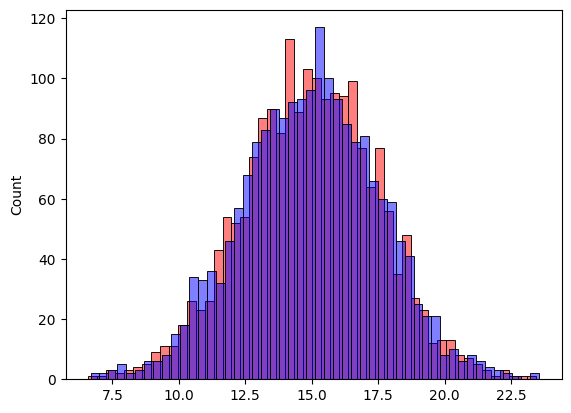

In [167]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [168]:
rmse(y_val, y_pred)

np.float64(0.46558976676101366)